# <span style='color:red'> Ten Classification Model on Census Income Dataset-EDA and data cleaning </span>

<span style='color:blue'> 1. EDA and FE </span>

1.Data Profiling

2.Stastical analysis

3.Graphical Analysis

4.Data Cleaning

5.Data Scaling

<span style='color:blue'> 2. Models </span>

1.Logistic Regression

2.Support Vector Classifier

3.Decision Tree Classifier

4.Random Forest Classifier

5.Bagging Classifier

6.Extra Tree Classifier

7.AdaBoost Classifier

8.Voting Classifier

9.GradientBoost Classifier

10.XGBoost Classifier

<span style='color:blue'> 3. Performance Metrices </span>

1.Accuracy Score

2.Precision Score

3.Recall Score

4.Roc_Auc Score

**Dataset: https://archive.ics.uci.edu/ml/datasets/Census+Income**

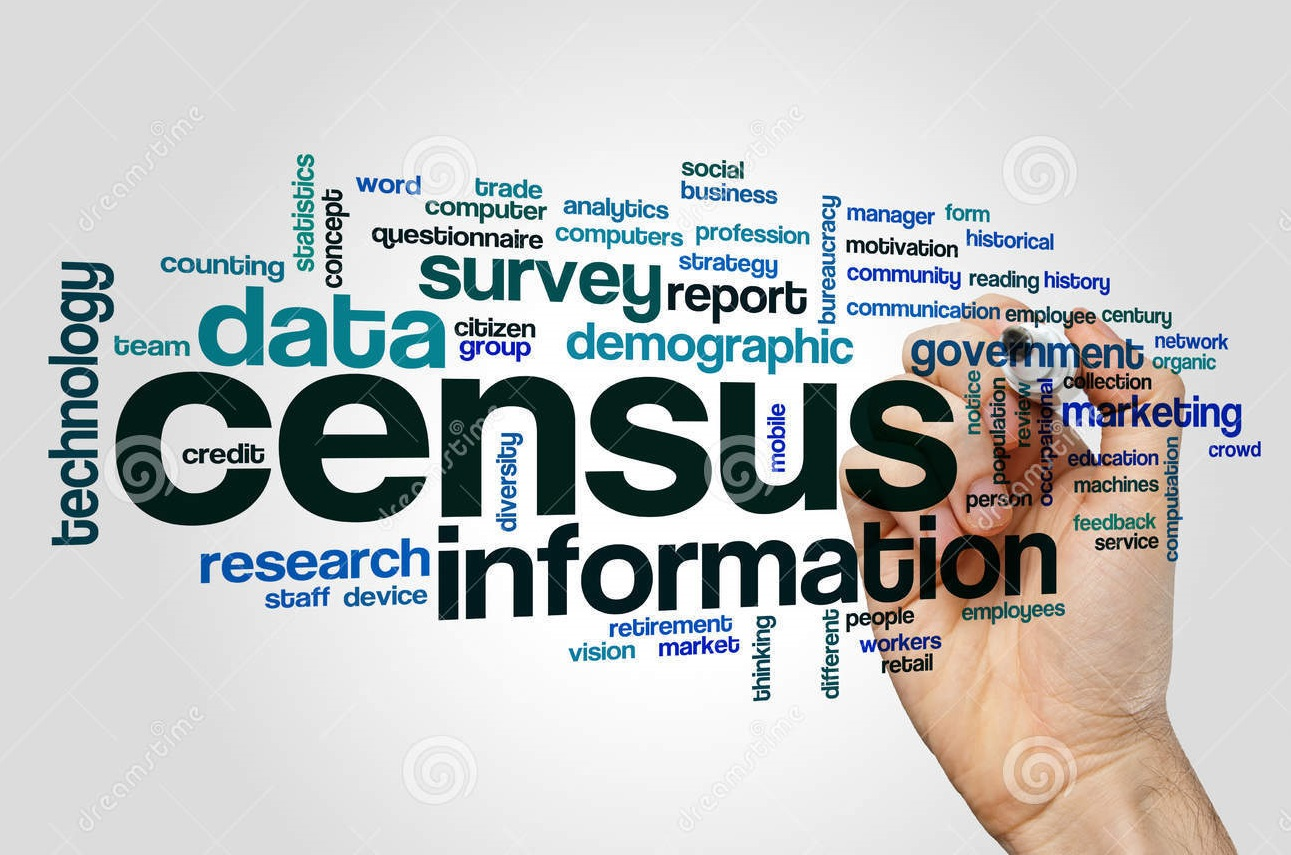

In [1]:
from IPython import display
display.Image('Desktop/Datasets/census.jpg')

# <span style ='color:red'> 1.0 Importing required libraries </span>

In [2]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <span style='color:red'> 2.0 Importing Dataset and Data Cleaning </span>

In [3]:
### importing both train and test dataset
columns_names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
dataset1=pd.read_csv('Desktop/Datasets/adult.csv',names=columns_names,header=None)
dataset2=pd.read_csv('Desktop/Datasets/adult1.csv',names=columns_names,header=None)
dataset1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataset2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
### joining both dataset and resetting index
dataset= pd.concat([dataset1,dataset2])
dataset.reset_index(inplace=True)

In [6]:
# dropping index feature as it is not required
dataset.drop('index',axis=1,inplace=True)

In [7]:
### getting shape of dataset
### dataset has 48842 records and 15 features
dataset.shape

(48842, 15)

In [8]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [9]:
dataset.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# <span style='color:blue'> 2.1 Dataset Information </span>

**Data Set Information:**
    
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

**Attribute Information:**

**Listing of attributes:**

1.50K, <=50K.

2.age: continuous.

3.workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

4.fnlwgt: continuous.

5.education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

6.education-num: continuous.

7.marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

8.occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

9.relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

10.race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

11.sex: Female, Male.

12.capital-gain: continuous.

13.capital-loss: continuous.

14.hours-per-week: continuous.

15.native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [10]:
### getting count of values in salary feature which is dependent feature

### Data cleaning is required as there is additional . which is creating 2 more categories

dataset['salary'].value_counts()

salary
 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: count, dtype: int64

In [11]:
### checking duplicates in dataset
dataset[dataset.duplicated()].shape

(29, 15)

In [12]:
## dropping duplicates in dataset
dataset.drop_duplicates(inplace=True)

In [13]:
dataset[dataset.duplicated()].shape

(0, 15)

In [14]:
### replacing . in salary feature 
dataset['salary']=dataset['salary'].str.replace('<=50K.','<=50K',regex=True)
dataset['salary']=dataset['salary'].str.replace('>50K.','>50K',regex=True)

In [15]:
### salary feature is clean and is divided into two categories
dataset.salary.value_counts()

salary
 <=50K    37128
 >50K     11685
Name: count, dtype: int64

In [16]:
### Checking null values in dataset
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [17]:
### checking unique categories in categorical features and unique values in numerical features

for feature in dataset.columns:
    print('feature: {} has {} unique values\n'.format(feature,dataset[feature].unique()))

feature: age has [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] unique values

feature: workclass has [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] unique values

feature: fnlwgt has [ 77516  83311 215646 ... 173449  89686 350977] unique values

feature: education has [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] unique values

feature: education_num has [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] unique values

feature: marital_status has [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] unique values

feature: 

# **Observations**

1.All categorical features have space and dash which requires cleaning.

2.Some categorical features like workclass, occupation, and native_country have ? as a value, it also requires cleaning.

In [18]:
### checking datatypes and null values in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education_num   48813 non-null  int64 
 5   marital_status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital_gain    48813 non-null  int64 
 11  capital_loss    48813 non-null  int64 
 12  hours_per_week  48813 non-null  int64 
 13  native_country  48813 non-null  object
 14  salary          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


# <span style='color:red'> 3.0 Numerical and Categorical features </span>

# <span style='color:red'> 3.1 Categorical features </span>

In [19]:
## Getting categorical features in dataset
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
print(categorical_features)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']


In [20]:
### Getting count of each category in each categorical feature
for feature in categorical_features:
    print("Feature Name:{}\n".format(dataset[feature].value_counts()))

Feature Name:workclass
 Private             33879
 Self-emp-not-inc     3861
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: count, dtype: int64

Feature Name:education
 HS-grad         15777
 Some-college    10869
 Bachelors        8020
 Masters          2656
 Assoc-voc        2060
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              656
 Doctorate         594
 5th-6th           508
 1st-4th           245
 Preschool          82
Name: count, dtype: int64

Feature Name:marital_status
 Married-civ-spouse       22372
 Never-married            16098
 Divorced                  6630
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: count, dtype: int64

Feature Na

# **Observations**

1.workclass has 2799 , occupation has 2809, and native_country has 856 ? as a value.

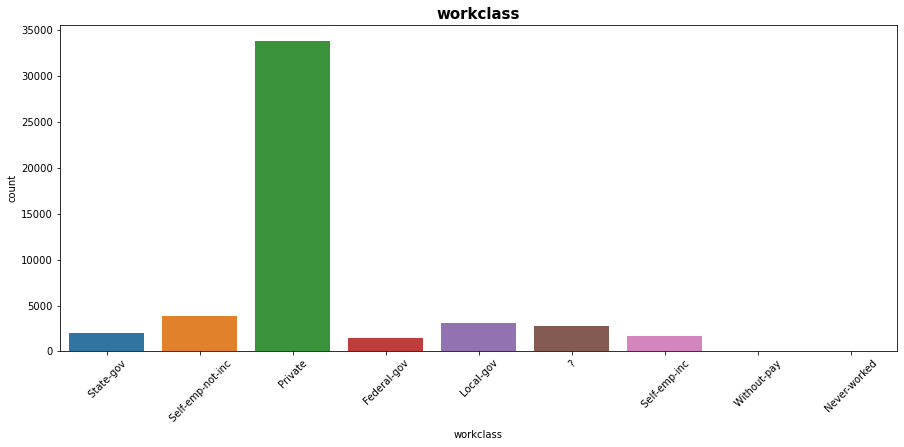

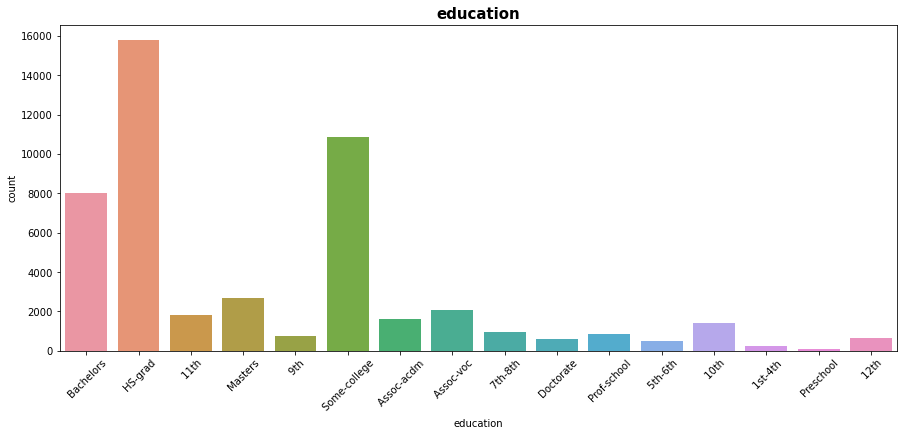

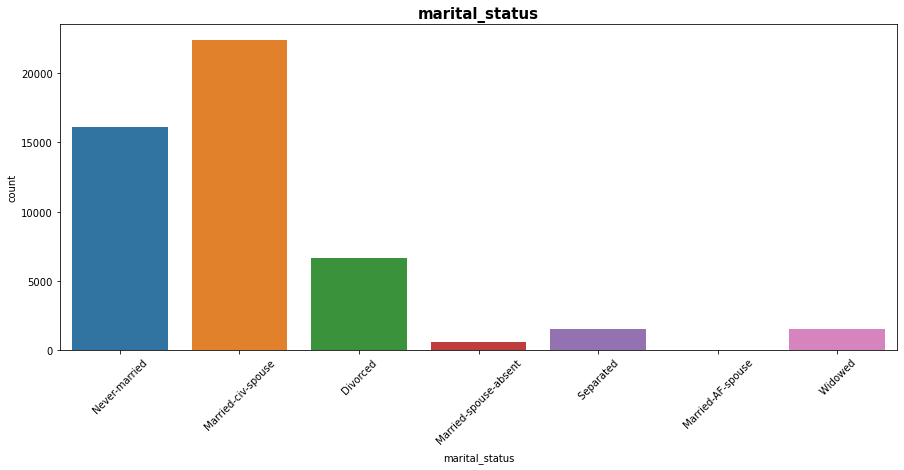

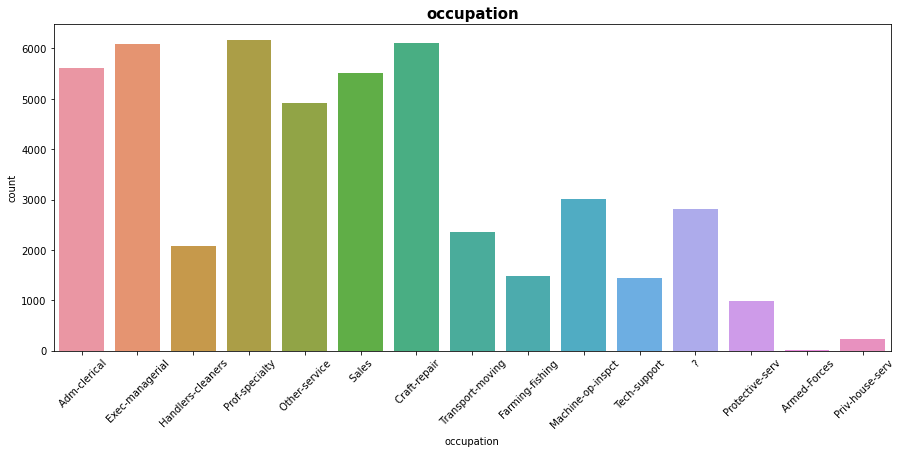

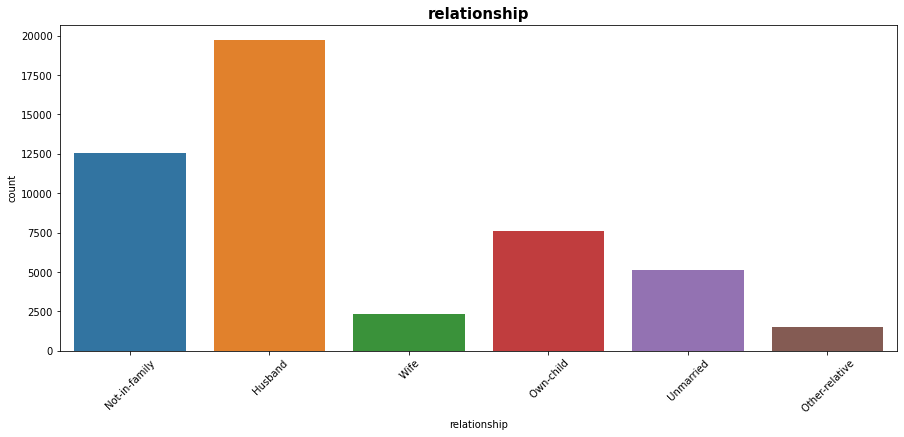

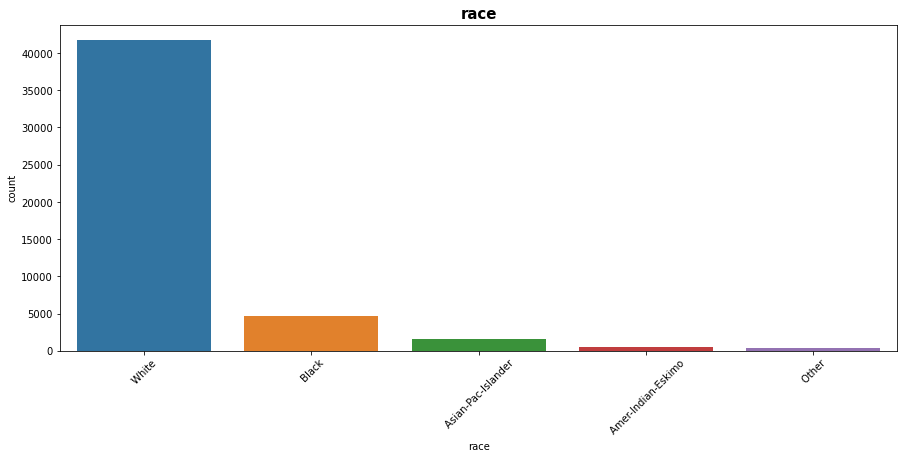

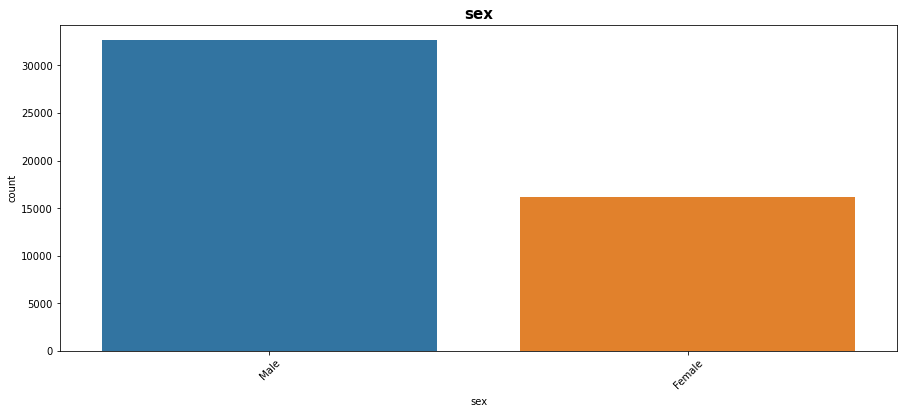

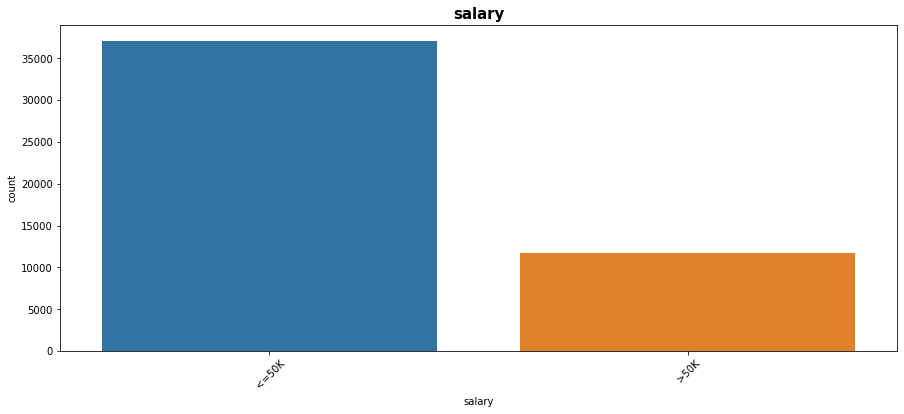

In [21]:
### Countplot to visualize the count of each category in each categorical feature
for feature in [feature for feature in categorical_features if feature not in ['native_country']]:
    plt.figure(figsize=(15,6))
    sns.countplot(data=dataset,x=feature)
    plt.title('{}'.format(feature),fontsize=15,fontweight='bold')
    plt.xticks(rotation=45)
    plt.show();

# **Observations**

1.The workclass feature has around 33K Private Employees, all other categories has less than 5K Employees whereas Never worked and Without pay has least employees.

2.In education feature, HS-grad has highest (around 16K) person, followed by some college (around 10K) and Bachelors (around 8K) people whereas preschool has least person in armed forces.

3.In Marital Status feature, Married-civ-Spouse has highest (around 22K) person, followed by never married (around 16K) and Divorced (around 6K) people whereas Married-AF-Spouse has least person.

4.In occupation feature, Ex-managerial, prof-speciality, craft repair has almost same employees and is highest. This is followed by admin clerical, sales and other service. The least employees are in

5.Husbands around 20K, not in family 12K, own child 7k and unmarried 5K contrubutes to nearly 90 percent of records in relationship feature.

6.Around 41K people are white by race, followed by 5K black, and Others.

7.There are more male Employees(around 32K) than female employees(16K).

8.Persons having salary less than 50K(35K Persons) are more in number than Persons having salary more than 50K(13K persons)

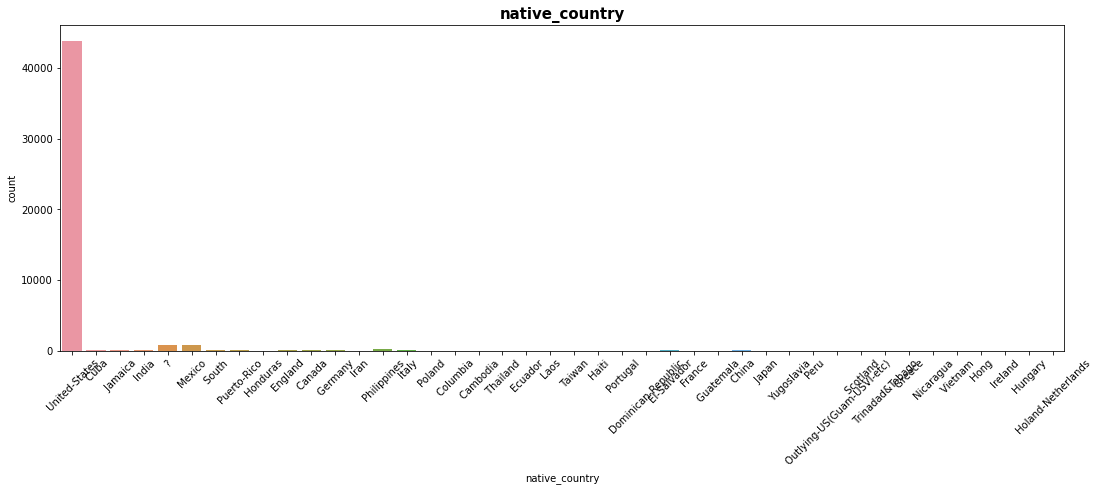

In [22]:
plt.figure(figsize=(18,6))
sns.countplot(data=dataset, x='native_country')
plt.title('native_country', fontsize=15, weight='bold')
plt.xticks(rotation=45)
plt.show();

# **Observations:**

1.In native country feature, Most employees are from united states (around 44k). The rest can be clubbed in others category.


# <span style='color:red'> 3.2 Numerical features</span>

In [23]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype != 'O']
print(numerical_features)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [24]:
for feature in numerical_features:
    print('feature: {} has {} unique values\n'.format(feature,dataset[feature].nunique()))

feature: age has 74 unique values

feature: fnlwgt has 28523 unique values

feature: education_num has 16 unique values

feature: capital_gain has 123 unique values

feature: capital_loss has 99 unique values

feature: hours_per_week has 96 unique values



# <span style='color:red'> 3.2.1 Discrete Numerical features </span>

In [25]:
discrete_features = [feature for feature in numerical_features if dataset[feature].nunique()<20]
print(discrete_features )

['education_num']


# <span style='color:red'> 3.2.2 Countplot of education_number </span>

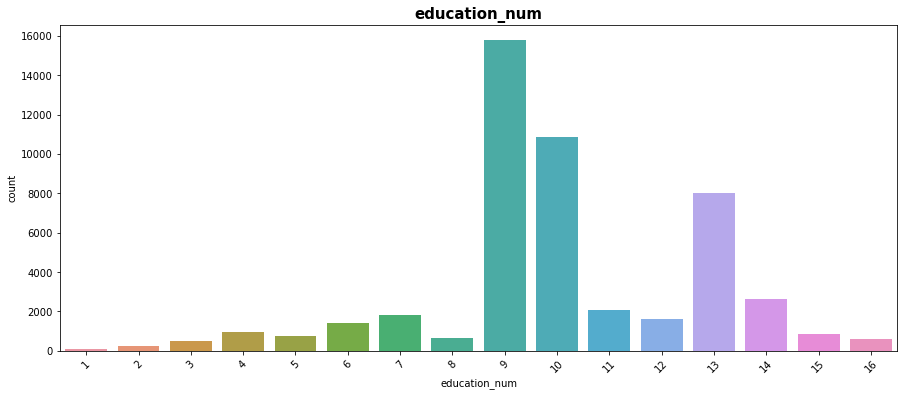

In [26]:
plt.figure(figsize=(15,6))
for feature in discrete_features:
    sns.countplot(data=dataset,x='education_num')
    plt.title('education_num',fontsize=15,fontweight='bold')
    plt.xticks(rotation=45)
    plt.show();

# <span style='color:red'> 3.3 Continuous Numerical feature </span>

In [27]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']


# <span style='color:Red'> 3.3.1 Distribution of Continuous Numerical Features </span>

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

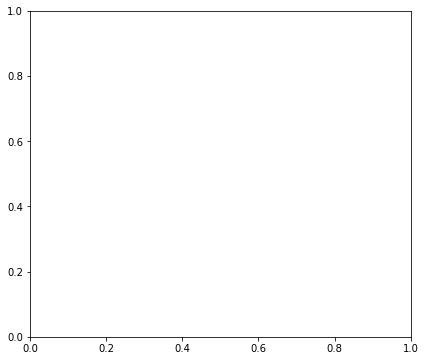

In [28]:
for i in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(dataset[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
    plt.show();

    